In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
dataset=pd.read_csv('diabetes.csv')
dataset.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [12]:
dataset.shape

(768, 9)

In [13]:
#check if any null features are present
dataset.isnull().values.any()


False

#### Correlation

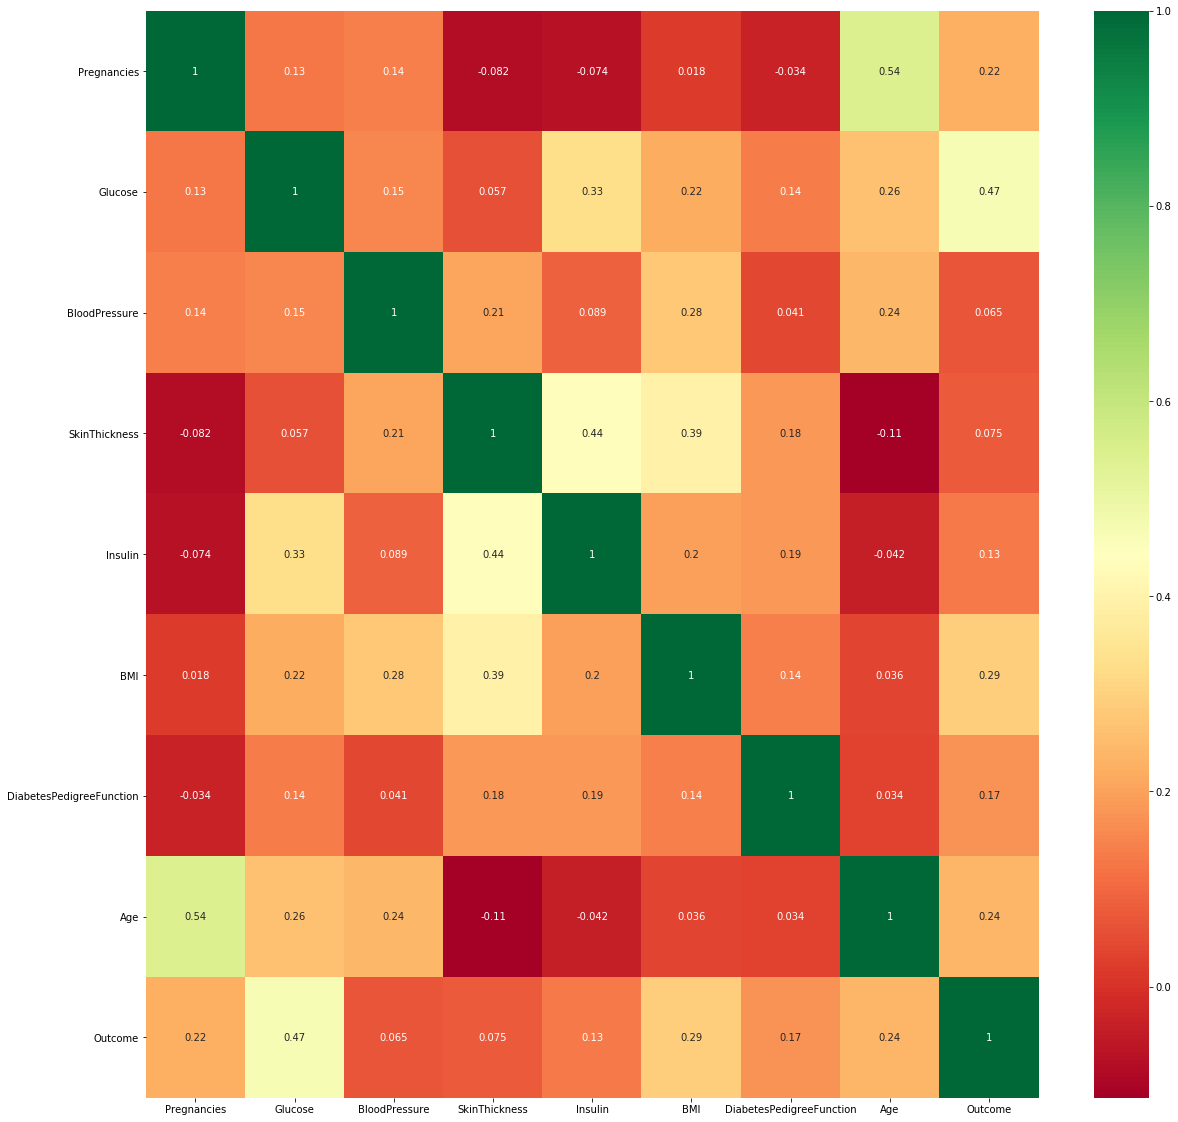

In [15]:
import seaborn as sns
correlation=dataset.corr()
highest_corr=correlation.index
plt.figure(figsize=(20,20))
#plot heatmap
g=sns.heatmap(dataset[highest_corr].corr(),annot=True,cmap='RdYlGn')

In [16]:
dataset.corr()

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221071                  0.137337   
BloodPressure             0.088933  0.281805                  0.041265   
SkinThickness             0.436783  0.392573                  0.183928   
Insulin                   1.000000  0.197859                  0.185071   
BMI                       0.197859  1.000000                  0.140647   
DiabetesPedigreeFunction  0.185071  0.140647                  1.000000   
Age                      -0.042163  0.036242                  0.033561   
Outcome                   0.130548  0.292695                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.263514  0.466581  
BloodPressure             0.239528  0.065068  
SkinThickness            -0.113970  0.074752  
Insulin                  -0.042163  0.130548  
BMI                       0.036242  0.292695  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

In [19]:
diabetes_positive_count=len(dataset.loc[dataset['Outcome']==1])
diabetes_negative_count=len(dataset.loc[dataset['Outcome']==0])

In [20]:
(diabetes_positive_count,diabetes_negative_count)

(268, 500)

### Train Test Split

In [23]:
from sklearn.model_selection import train_test_split
feature_col=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
predition_class=['Outcome']

In [24]:
x=dataset[feature_col].values
y=dataset[predition_class].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=10)

### Check for missing data(i.e datas with value '0')

In [28]:
print("Total no of rows missing Glucose concentration:{0}".format(len(dataset.loc[dataset['Glucose']==0])))
print("Total no of rows missing BP :{0}".format(len(dataset.loc[dataset['BloodPressure']==0])))
print("Total no of rows missing SkinThickness:{0}".format(len(dataset.loc[dataset['SkinThickness']==0])))
print("Total no of rows missing Insulin concentration:{0}".format(len(dataset.loc[dataset['Insulin']==0])))
print("Total no of rows missing BMI:{0}".format(len(dataset.loc[dataset['BMI']==0])))
print("Total no of rows missing DiabetesPedigreeFunction:{0}".format(len(dataset.loc[dataset['DiabetesPedigreeFunction']==0])))
print("Total no of rows missing Age:{0}".format(len(dataset.loc[dataset['Age']==0])))

Total no of rows missing Glucose concentration:5
Total no of rows missing BP :35
Total no of rows missing SkinThickness:227
Total no of rows missing Insulin concentration:374
Total no of rows missing BMI:11
Total no of rows missing DiabetesPedigreeFunction:0
Total no of rows missing Age:0


In [34]:
#replacing 0's with mean of that particular feature
from sklearn.preprocessing import Imputer
fill_values=Imputer(missing_values=0,strategy='mean',axis=0)
x_train=fill_values.fit_transform(x_train)
x_test=fill_values.fit_transform(x_test)

C:\Users\Palak agarwal\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


## Applying Random Forest Classification

In [43]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model=RandomForestClassifier(random_state=10)
random_forest_model.fit(x_train,y_train.ravel())

C:\Users\Palak agarwal\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=10, verbose=0, warm_start=False)

In [44]:
predict_train_data=random_forest_model.predict(x_test)
from sklearn import metrics
print("Accuracy={0:.3f}".format(metrics.accuracy_score(y_test,predict_train_data)))

Accuracy=0.727


### Applying xgboost

In [56]:
##Hyper Parameter optimization
params={
    "learning_rate":[0.05,0.10,0.15,0.20,0.25,0.30],
    "max_depth":[3,4,5,6,8,10,12,15],
    "min_child_weight":[1,3,5,7],
    "gamma":[0.0,0.1,0.2,0.3,0.4],
    "colsample_bytree":[0.3,0.4,0.5,0.6,0.7]
}

In [57]:
#Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
import xgboost

In [58]:
classifier=xgboost.XGBClassifier()

In [64]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=5)

In [68]:
def timer(start_timer=None):
    if not start_timer:
        start_timer=datetime.now()
        return start_timer
    elif start_timer:
        thour,temp_sec=divmod((datetime.now()-start_timer).total_seconds(),3600)
        tmin,tsec=divmod(temp_sec,60)
        print("\n Time Taken:%i hours %i minutes and %i seconds" %(thour,tmin,round(tsec,2)))
        

In [69]:
from datetime import datetime
#Here we go
start_timer=timer(None) #timer starts from this time
random_search.fit(x_train,y_train.ravel())
timer(start_timer) #ends here

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  18 out of  25 | elapsed:    1.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    1.2s finished



 Time Taken:0 hours 0 minutes and 1 seconds


In [70]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.5, gamma=0.1,
       learning_rate=0.05, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [71]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.5, gamma=0.1,
       learning_rate=0.05, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [72]:
classifier.fit(x_train,y_train)

C:\Users\Palak agarwal\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Palak agarwal\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.5, gamma=0.1,
       learning_rate=0.05, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [74]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,x_train,y_train.ravel(),cv=10)
score.mean()

0.7541414141414141

In [75]:
y_pred=classifier.predict(x_test)

In [76]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
score=accuracy_score(y_test,y_pred)
print(cm)
print(score)

[[125  19]
 [ 39  48]]
0.7489177489177489


### xgboost gives better accuracy